<a href="https://colab.research.google.com/github/Bahtiarrifaistudent/Asisten-20berbasis-20NLP-20Polindra/blob/main/Praktikum_Analisis_Pengaduan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving stream_diknas_selesai.csv to stream_diknas_selesai.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(list(uploaded.keys())[0])


In [5]:
df.head()


,id,JudulLaporan,IsiLaporan,DisposisiInstansi,DisposisiInstansiID,Kategori,KategoriID,Status,Area,AreaID,TanggalLaporanMasuk,TanggalDisposisi,TanggalLaporanDitutup,TanggalLaporanAktivitasTerakhir
0,66425,Peserta KKS Belum Mendapat KIP untuk Anak Seko...,38fcob45574000 saya penerima kks.tetapi saya t...,Kementerian Pendidikan dan Kebudayaan,416,Kartu Indonesia Pintar (KIP),141,Selesai,Sindang,34620,7/1/2015 10:27:00,11/2/2015 10:30:00,25/2/2015 01:00:00,11/2/2015 10:56:00
1,66618,Dana Belum Turun dari Bank di Pemalang,ini saya dari org tua siswa SMP NEG 3 PEMALANG...,Kementerian Pendidikan dan Kebudayaan,416,Kartu Indonesia Pintar (KIP),141,Selesai,Pemalang,731,8/1/2015 14:00:00,26/1/2015 13:18:00,24/4/2015 15:06:00,24/4/2015 15:06:00
2,66722,Anak Sekolah Belum Menerima KIP,Sy pnm kks purwanto no kks 3374011412051053 sy...,Kementerian Pendidikan dan Kebudayaan,416,Kartu Indonesia Pintar (KIP),141,Selesai,Nasional,34,9/1/2015 09:21:00,11/2/2015 12:35:00,26/2/2015 01:00:00,12/2/2015 10:27:00
3,66740,Peserta KKS Tidak Mendapat KIP untuk Anaknya (...,38FHJK45574003 anak saya tidak mendapatkan kar...,Kementerian Pendidikan dan Kebudayaan,416,Kartu Indonesia Pintar (KIP),141,Selesai,Buniasih,34635,9/1/2015 11:26:00,11/2/2015 12:42:00,26/2/2015 01:00:00,12/2/2015 10:27:00
4,66777,Peserta KKS Tidak Mendapat KIP untuk Anak Seko...,38EZDU45595005 Gmana no kks ini bsa dapat indo...,Kementerian Pendidikan dan Kebudayaan,416,Kartu Indonesia Pintar (KIP),141,Selesai,Wanasaraya,34575,9/1/2015 14:02:00,11/2/2015 12:47:00,26/2/2015 01:00:00,12/2/2015 10:27:00


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               117 non-null    int64 
 1   JudulLaporan                     117 non-null    object
 2   IsiLaporan                       117 non-null    object
 3   DisposisiInstansi                117 non-null    object
 4   DisposisiInstansiID              117 non-null    int64 
 5   Kategori                         117 non-null    object
 6   KategoriID                       117 non-null    int64 
 7   Status                           117 non-null    object
 8   Area                             117 non-null    object
 9   AreaID                           117 non-null    int64 
 10  TanggalLaporanMasuk              117 non-null    object
 11  TanggalDisposisi                 117 non-null    object
 12  TanggalLaporanDitutup            117

In [7]:
df.isnull().sum()


,0
id,0
JudulLaporan,0
IsiLaporan,0
DisposisiInstansi,0
DisposisiInstansiID,0
Kategori,0
KategoriID,0
Status,0
Area,0
AreaID,0


In [8]:
df = df.drop_duplicates()


In [9]:
df['Kategori'] = df['Kategori'].fillna('Tidak Diketahui')
df['Status'] = df['Status'].fillna('Tidak Diketahui')
df['Area'] = df['Area'].fillna('Tidak Diketahui')


In [10]:
df['TanggalLaporanMasuk'] = pd.to_datetime(
    df['TanggalLaporanMasuk'], errors='coerce'
)


In [11]:
df['Kategori'].value_counts()


,count
Kategori,
Kartu Indonesia Pintar (KIP),106
Bantuan Siswa Miskin (BSM),3
Pendidikan,3
Kepegawaian,2
Pendidikan Dasar dan Menengah (Dikdasmen),2
Kepesertaan - Kartu & Non Kartu,1


In [12]:
df['Area'].value_counts()


,count
Area,
Nasional,33
Suniarsih,6
Purbawinangun,2
Kutai Barat,2
Tangkil,2
...,...
Palir,1
Sindangkasih,1
Mejasem Timur,1


In [13]:
df['Status'].value_counts()


,count
Status,
Selesai,117


/tmp/ipython-input-915910123.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('TanggalLaporanMasuk').resample('M').size().plot()


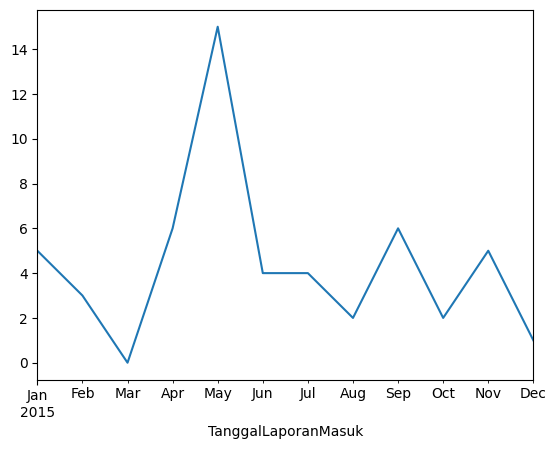

In [14]:
df.set_index('TanggalLaporanMasuk').resample('M').size().plot()
plt.show()


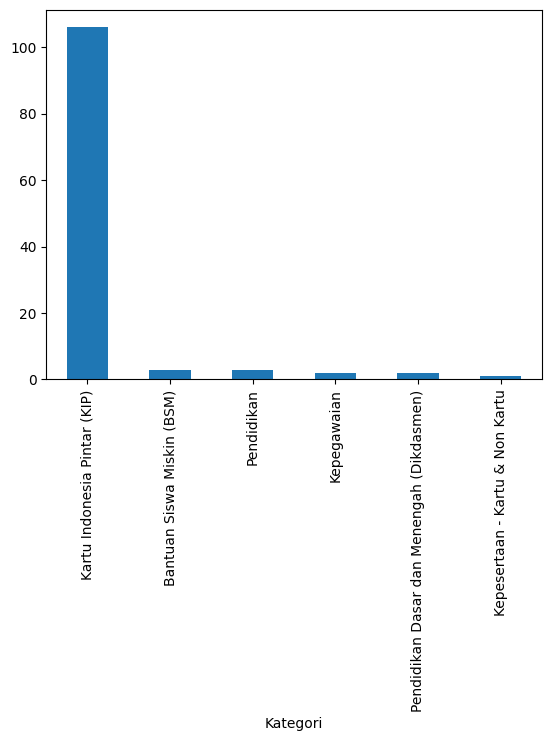

In [15]:
df['Kategori'].value_counts().plot(kind='bar')
plt.show()


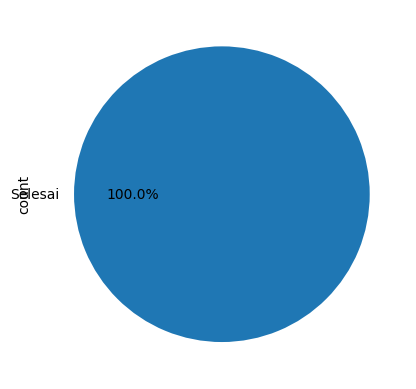

In [16]:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


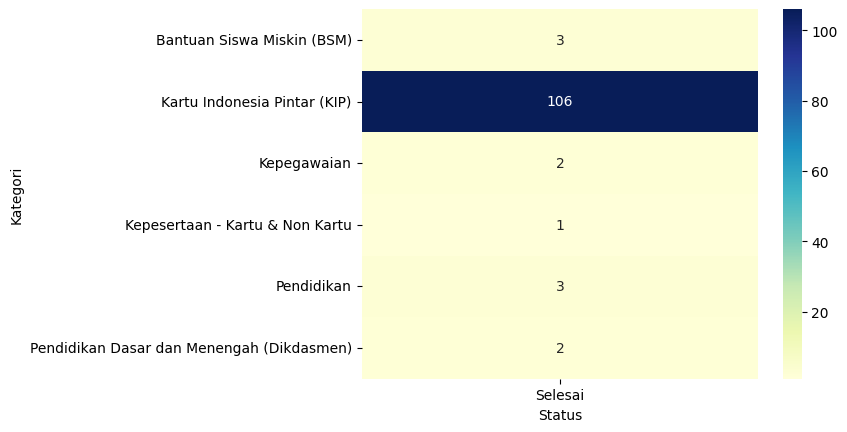

In [17]:
import seaborn as sns

pivot = pd.pivot_table(
    df,
    values='id',
    index='Kategori',
    columns='Status',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


In [18]:
df['Bulan'] = df['TanggalLaporanMasuk'].dt.to_period('M')
df.groupby('Bulan').size()


,0
Bulan,
2015-01,5
2015-02,3
2015-04,6
2015-05,15
2015-06,4
2015-07,4
2015-08,2
2015-09,6
2015-10,2


In [22]:
# Pastikan nama kolom bersih dari spasi
df.columns = df.columns.str.strip()

# Analisis jumlah pengaduan berdasarkan instansi
pengaduan_instansi = df['DisposisiInstansi'].value_counts()

print("Jumlah Pengaduan Berdasarkan Instansi:")
display(pengaduan_instansi)


Jumlah Pengaduan Berdasarkan Instansi:


,count
DisposisiInstansi,
Kementerian Pendidikan dan Kebudayaan,117


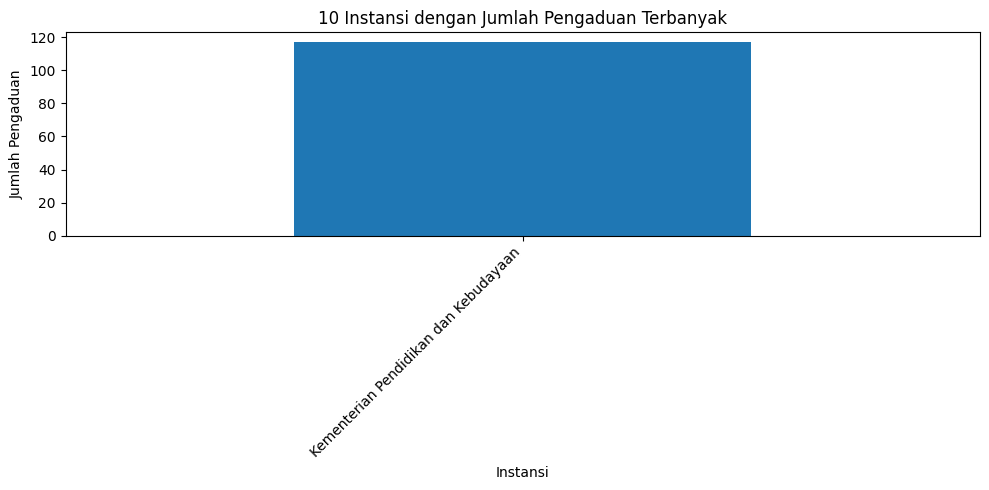

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
pengaduan_instansi.head(10).plot(kind='bar')
plt.title('10 Instansi dengan Jumlah Pengaduan Terbanyak')
plt.xlabel('Instansi')
plt.ylabel('Jumlah Pengaduan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
# Ambil instansi dengan pengaduan terbanyak
instansi_terbanyak = pengaduan_instansi.idxmax()
print("Instansi dengan Pengaduan Terbanyak:", instansi_terbanyak)

# Filter data berdasarkan instansi tersebut
df_instansi = df[df['DisposisiInstansi'] == instansi_terbanyak]

# Hitung status pengaduan
status_instansi = df_instansi['Status'].value_counts()
display(status_instansi)


Instansi dengan Pengaduan Terbanyak: Kementerian Pendidikan dan Kebudayaan


,count
Status,
Selesai,117


In [25]:
kategori_instansi = df_instansi['Kategori'].value_counts()

print("Jenis Laporan pada Instansi Terbanyak:")
display(kategori_instansi)


Jenis Laporan pada Instansi Terbanyak:


,count
Kategori,
Kartu Indonesia Pintar (KIP),106
Bantuan Siswa Miskin (BSM),3
Pendidikan,3
Kepegawaian,2
Pendidikan Dasar dan Menengah (Dikdasmen),2
Kepesertaan - Kartu & Non Kartu,1


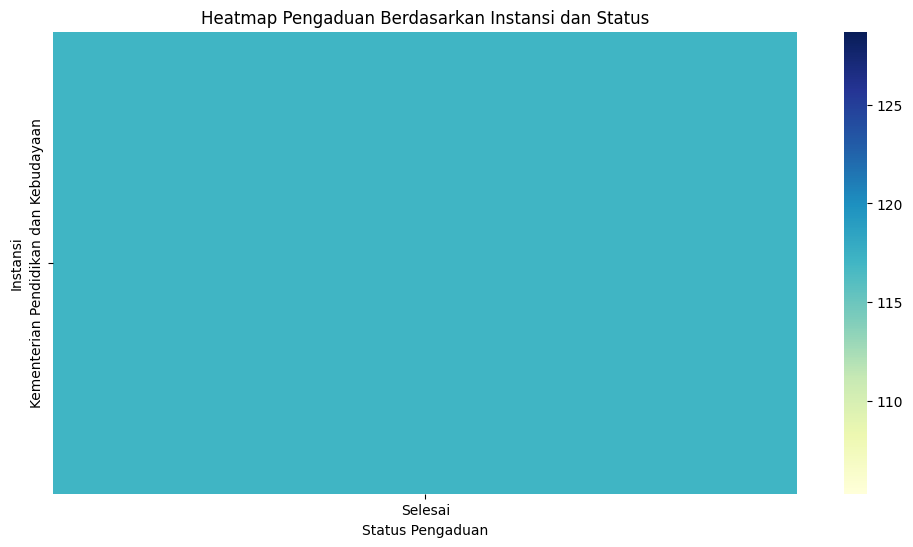

In [26]:
import seaborn as sns

pivot_instansi_status = pd.pivot_table(
    df,
    values='id',
    index='DisposisiInstansi',
    columns='Status',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_instansi_status, cmap='YlGnBu')
plt.title('Heatmap Pengaduan Berdasarkan Instansi dan Status')
plt.xlabel('Status Pengaduan')
plt.ylabel('Instansi')
plt.show()
